In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from scipy.integrate import simps
from numpy import trapz

from scipy.optimize import curve_fit
from scipy.stats import rayleigh



from scipy.optimize import curve_fit
from scipy import integrate
import matplotlib.ticker as mtick
from matplotlib.ticker import FormatStrFormatter
import matplotlib as mpl
from scipy import integrate

In [2]:
## Efficiency of neutron detector
data_eff = np.loadtxt("Efficiency_neutron_detector/efficiency_values.txt",skiprows=1)
neutron_energy_eff = data_eff[:,0]
eff = data_eff[:,1]
eff_err = data_eff[:,2]

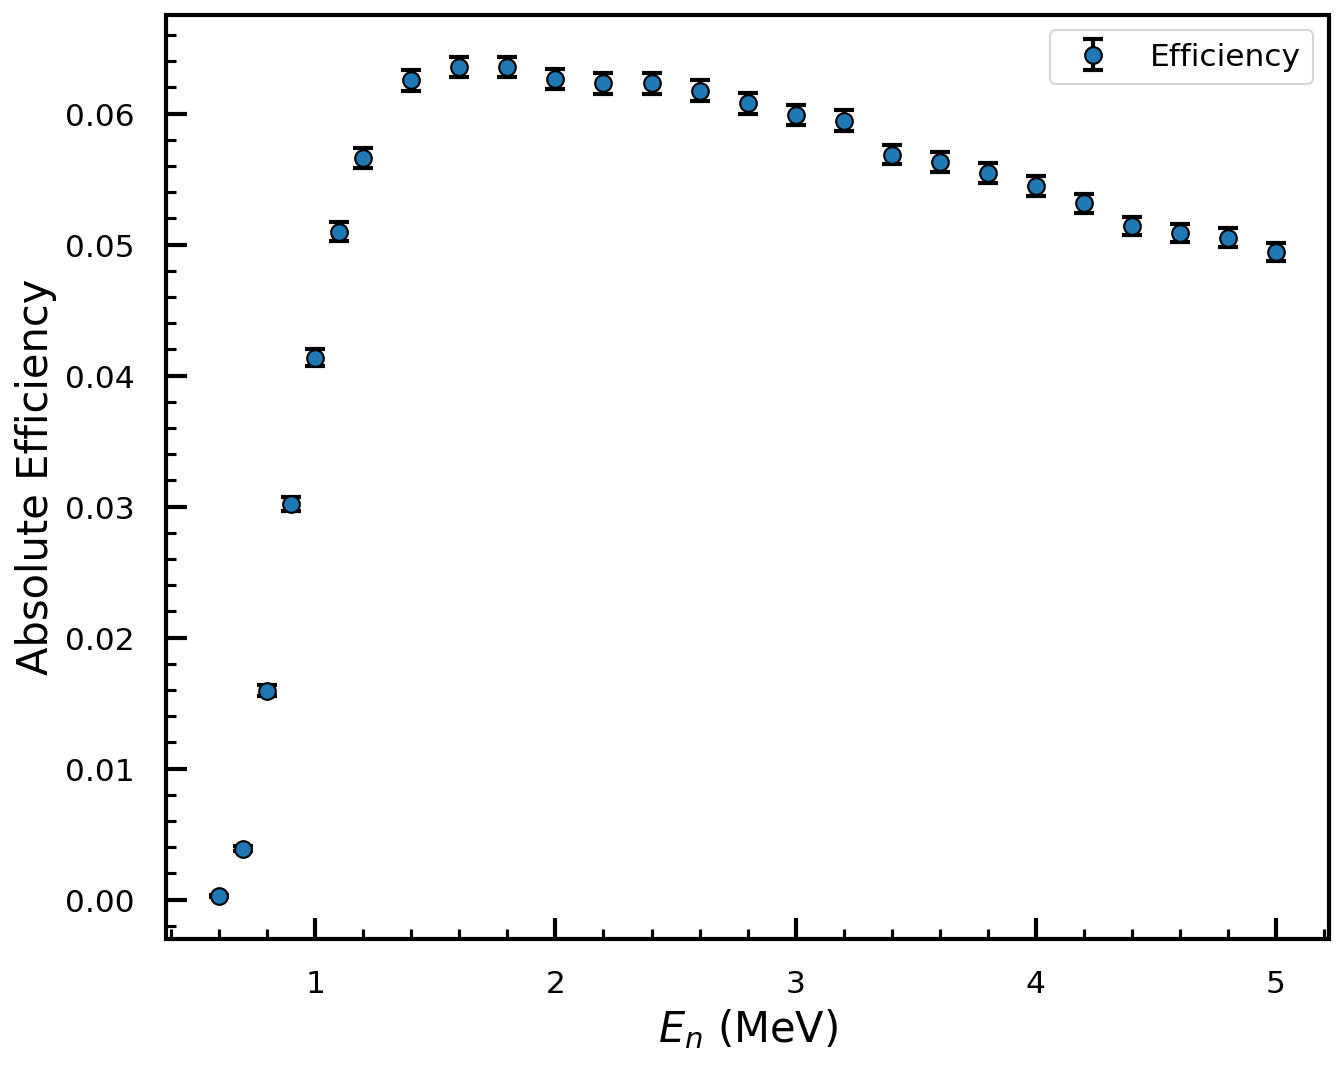

In [3]:
fig,ax=plt.subplots(1,1,figsize=(12,12))
fig.set_dpi(150)
fig.set_size_inches(10,8)
ax.tick_params(which='major', direction='in', width=2, length=10, color='k', pad=15)
ax.tick_params(which='minor', direction='in', width=1.5, length=5, color='k', pad=15)
ax.xaxis.set_minor_locator(mtick.AutoMinorLocator(5))
ax.yaxis.set_minor_locator(mtick.AutoMinorLocator(5))
ax.tick_params(labelsize=15)
ax.patch.set_edgecolor('k')
ax.patch.set_linewidth(2)
ax.errorbar(neutron_energy_eff,eff,yerr=eff_err,color="tab:blue",fmt='o',ms=8,ecolor='k',solid_capstyle='projecting', capsize=5,capthick=2,elinewidth=2,markeredgecolor='k',label="Efficiency")
plt.ylabel("Absolute Efficiency", fontsize=20)
plt.xlabel("$E_n$ (MeV)", fontsize=20)
plt.legend(fontsize=15)
plt.savefig("neutron_detector_efficiency.png")

In [4]:
pwd

'/Users/shahinashahina/Documents/PhD/Experiments/25Mg(a,n)/CAMPAIGN_2021/25Mg_codes_Shahina/python3_code'

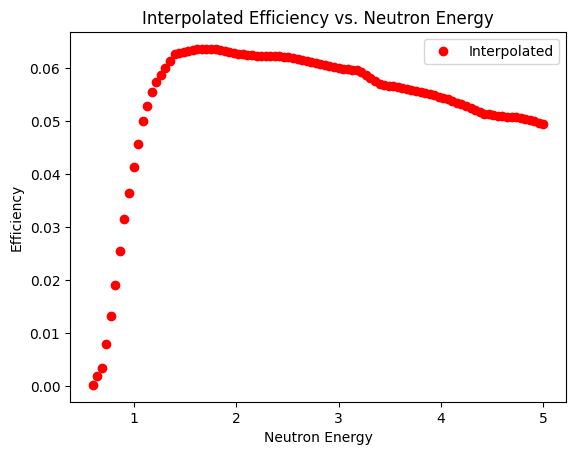

In [5]:
from scipy.interpolate import interp1d

# Interpolate between data points
interp_func = interp1d(neutron_energy_eff, eff, kind='linear')  # Linear interpolation
neutron_energy_interp = np.linspace(min(neutron_energy_eff), max(neutron_energy_eff), 100)  # New energy values for interpolation
eff_interp = interp_func(neutron_energy_interp)

# Plot the interpolated line
plt.plot(neutron_energy_interp, eff_interp,"o", color='red', label='Interpolated')

# Additional plot settings
plt.xlabel('Neutron Energy')
plt.ylabel('Efficiency')
plt.title('Interpolated Efficiency vs. Neutron Energy')
plt.legend()

In [6]:
#25Mg(a,n1)28Si
Q = 2.65361 -1.779 #MeV
M1 = 4.00260325413 # Mass of incident particle alpha (in amu) 
M2 = 24.985836964  # Mass of target 25Mg ( in amu)
M3 = 1.00866491582 # Mass of neutron 
M4 = 27.97692653499  # Mass of 28Si

def Et(Ebeam):
    return Ebeam + Q
def A(Ebeam):
    return (M1*M4*(Ebeam/Et(Ebeam)))/(M1+M2)/(M3+M4)
def B(Ebeam):
    return M1*M3*Ebeam/Et(Ebeam)/(M1+M2)/(M3+M4)
def C(Ebeam):
    return M2*M3/(M1+M2)/(M3+M4)*(1+M1*Q/M2/Et(Ebeam))
def D(Ebeam):
    return M2*M4/(M1+M2)/(M3+M4)*(1+M1*Q/M2/Et(Ebeam))

def En(Ebeam,theta):
    theta = (theta*np.pi)/(180)  # theta is in degrees 
    return (B(Ebeam)+ D(Ebeam)+2*np.sqrt( A(Ebeam)*C(Ebeam))*np.cos(theta))*Et(Ebeam)
def En_lab(Ebeam,theta): # this gives neutron energy in the lab frame 
    theta_rad = (theta*np.pi)/(180)  # theta is in degrees 
    return Et(Ebeam)*(B(Ebeam))*(np.cos(theta_rad) + (D(Ebeam)/B(Ebeam) - (np.sin(theta_rad))**2)**0.5)**2

In [7]:
En(2.216,45)

2.9376196752096186

In [8]:
data = np.loadtxt("counts_unfolding.txt")

In [26]:
pwd

'/Users/shahinashahina/Documents/PhD/Experiments/25Mg(a,n)/CAMPAIGN_2021/25Mg_codes_Shahina/python3_code'

In [9]:
runNumber = data[:,0]

In [10]:
charge = data[:,1]

In [11]:
charge = (charge*10**(-8))/(1.6*10**(-19))

In [12]:
energy = (data[:,2])/1000

In [13]:
neutron_energy = En(energy,55)

In [14]:
neutron_energy

array([2.89285897, 2.88633969, 2.87791689, 2.87122503, 2.86425451,
       2.85760408, 2.85062933, 2.84391791, 2.83708787, 2.83023256,
       2.82353722, 2.81680712, 2.81012549, 2.80328042, 2.79655767,
       2.79003006, 2.78328456, 2.77653261, 2.76987469, 2.76330125,
       2.75667552, 2.75012582, 2.74344067, 2.73673211, 2.7302342 ,
       2.72371153, 2.71737124, 2.7108172 , 2.70425685, 2.69765447,
       2.69127838, 2.68470825, 2.67815887, 2.67179013, 2.66534388,
       2.65757223, 2.6496319 , 2.64157699, 2.63333806, 2.6253551 ,
       2.61746021, 2.60950446, 2.60138383, 2.59339512, 2.58556357,
       2.5776027 , 2.5619602 , 2.5539682 , 2.54610648, 2.53843414,
       2.53206814, 2.52301434, 2.50436255, 2.49589934, 2.48491555,
       2.47437982, 2.46549242, 2.45533689, 2.44582876, 2.43566123,
       2.42698879, 2.4171621 , 2.40903381, 2.39768344, 2.38854508,
       2.3811026 , 2.37323164, 2.35669486, 2.34874248, 2.33918105,
       2.33182799, 2.3226964 , 2.31489082, 2.30595494, 2.29633

In [15]:
eff_at_experimental_neutron_energies = interp_func(neutron_energy)

In [16]:
#yield_25Mg = data[:,3]

In [17]:
counts_25Mg_n1 = data[:,3]
counts_25Mg_n0 = data[:,4]
counts_13C = data[:,5]
counts_11B = data[:,6]
#counts_17O_n0= data[:,7]
#counts_17O_n1 = data[:,8]



In [18]:
counts_25Mg_n0_err = np.sqrt(counts_25Mg_n0)
counts_25Mg_n1_err = np.sqrt(counts_25Mg_n1)
counts_13C_err = np.sqrt(counts_13C)
counts_11B_err = np.sqrt(counts_11B)
#counts_17O_n0_err = np.sqrt(counts_17O_n0)
#counts_17O_n1_err = np.sqrt(counts_17O_n1)

In [19]:
yield_25Mg_n0 = counts_25Mg_n0/charge
yield_25Mg_n1 = counts_25Mg_n1/charge
yield_13C = counts_13C/charge
yield_11B = counts_11B/charge
#yield_17O_n0 = counts_17O_n0/charge
#yield_17O_n1 = counts_17O_n1/charge

In [20]:
yield_25Mg_n0_err = counts_25Mg_n0_err/charge
yield_25Mg_n1_err = counts_25Mg_n1_err/charge
yield_13C_err = counts_13C_err/charge
yield_11B_err = counts_11B_err/charge
#yield_17O_n0_err = counts_17O_n0_err/charge
#yield_17O_n1_err = counts_17O_n1_err/charge


In [21]:
#Converting yield to cross_section
N_t = 1.871027333934069e+18 # atoms/cm^2 
cross_section_25Mg_n1 = yield_25Mg_n1/(N_t*eff_at_experimental_neutron_energies)
cross_section_err_25Mg_n1 = yield_25Mg_n1_err/(N_t*eff_at_experimental_neutron_energies)

cross_section_25Mg_n1 = cross_section_25Mg_n1*10**24
cross_section_err_25Mg_n1 = cross_section_err_25Mg_n1*10**24

In [22]:
# Writing arrays to a file
output_file_1 = "cross_section_25Mg_n1.txt"

with open(output_file_1, 'w') as file1:
    for i in range(len(energy)):
        file1.write("%f \t %e  \t %e \n" %(energy[i],cross_section_25Mg_n1[i],cross_section_err_25Mg_n1[i]))
file1.close()

In [23]:
pwd

'/Users/shahinashahina/Documents/PhD/Experiments/25Mg(a,n)/CAMPAIGN_2021/25Mg_codes_Shahina/python3_code'

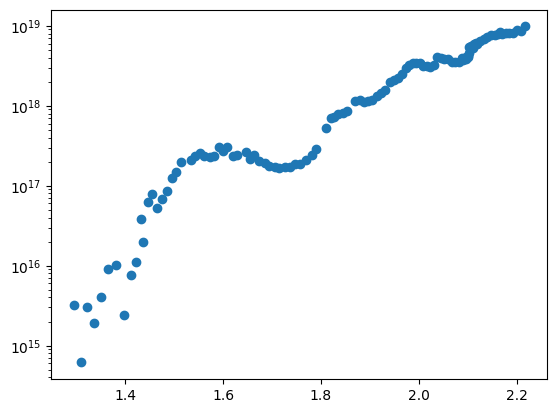

In [24]:
plt.plot(energy,cross_section_25Mg_n1*10**(24),"o")
plt.yscale("log")

In [24]:
pwd

'/Users/shahinashahina/Documents/PhD/Experiments/25Mg(a,n)/CAMPAIGN_2021/25Mg_codes_Shahina/python3_code'

In [25]:
# Writing arrays to a file
output_file_1 = "yield_data_files/yield_25Mg.txt"

with open(output_file_1, 'w') as file1:
    for i in range(len(energy)):
        file1.write("%f \t %f \t %f \n" %(energy[i],yield_25Mg_n0[i],yield_25Mg_n0_err[i]))
file1.close()




In [26]:
# Writing arrays to a file
output_file_2 = "yield_data_files/yield_13C.txt"

with open(output_file_2, 'w') as file2:
    for i in range(len(energy)):
        file2.write("%f \t %f \t %f \n" %(energy[i],yield_13C[i],yield_13C_err[i]))
file2.close()

In [27]:
"""
# Writing arrays to a file
output_file_3 = "yield_data_files/yield_17O_n0.txt"

with open(output_file_3, 'w') as file3:
    for i in range(len(energy)):
        file3.write("%f \t %f \t %f \n" %(energy[i],yield_17O_n0[i],yield_17O_n0_err[i]))
file3.close()


"""


'\n# Writing arrays to a file\noutput_file_3 = "yield_data_files/yield_17O_n0.txt"\n\nwith open(output_file_3, \'w\') as file3:\n    for i in range(len(energy)):\n        file3.write("%f \t %f \t %f \n" %(energy[i],yield_17O_n0[i],yield_17O_n0_err[i]))\nfile3.close()\n\n\n'

In [28]:
# looking at runs < 1664 ( less than 2.15 in energy )
mask1 = runNumber < 1665
runNumber_masked_1 = runNumber[mask1]
energy_masked_1 = energy[mask1]
yield_25Mg_n0_masked_1= yield_25Mg_n0[mask1]
yield_25Mg_n0_err_masked_1 = yield_25Mg_n0_err[mask1]
yield_25Mg_n1_masked_1= yield_25Mg_n1[mask1]
yield_25Mg_n1_err_masked_1 = yield_25Mg_n1_err[mask1]

cross_section_25Mg_n1_masked_1 = cross_section_25Mg_n1[mask1]
cross_section_err_25Mg_n1_masked_1 = cross_section_err_25Mg_n1[mask1]

In [29]:
 #Element to find the index of
run_to_find = 1677
# Find the indices where the element occurs
index1 = np.argwhere(runNumber == run_to_find)

In [30]:
#Element to find the index of
run_to_find = 1664
# Find the indices where the element occurs
index5 = np.argwhere(runNumber == run_to_find)

In [31]:
index5

array([[86]])

In [32]:
 #Element to find the index of
run_to_find = 1706
# Find the indices where the element occurs
index2 = np.argwhere(runNumber == run_to_find)

In [33]:
index1,index2

(array([[97]]), array([], shape=(0, 1), dtype=int64))

In [34]:
runNumber[102:131]

array([1682., 1683., 1684., 1685., 1686., 1687.])

In [35]:
1711, 1811

(1711, 1811)

In [36]:
#Element to find the index of
run_to_find = 1711
# Find the indices where the element occurs
index3 = np.argwhere(runNumber == run_to_find)

In [37]:
index3

array([], shape=(0, 1), dtype=int64)

In [38]:
#Element to find the index of
run_to_find = 1811
# Find the indices where the element occurs
index4 = np.argwhere(runNumber == run_to_find)

In [39]:
index4

array([], shape=(0, 1), dtype=int64)

In [40]:
runNumber

array([1572., 1573., 1574., 1575., 1576., 1577., 1578., 1579., 1580.,
       1581., 1582., 1583., 1584., 1585., 1586., 1587., 1588., 1589.,
       1590., 1591., 1592., 1593., 1594., 1595., 1596., 1597., 1598.,
       1599., 1600., 1601., 1602., 1603., 1604., 1605., 1606., 1607.,
       1608., 1609., 1610., 1611., 1612., 1613., 1614., 1615., 1616.,
       1617., 1618., 1619., 1620., 1621., 1622., 1623., 1627., 1628.,
       1629., 1630., 1631., 1632., 1633., 1634., 1635., 1636., 1637.,
       1638., 1639., 1640., 1641., 1643., 1644., 1645., 1646., 1647.,
       1648., 1649., 1650., 1651., 1652., 1653., 1656., 1657., 1658.,
       1659., 1660., 1661., 1662., 1663., 1664., 1665., 1666., 1667.,
       1668., 1669., 1670., 1671., 1672., 1673., 1674., 1677., 1678.,
       1679., 1680., 1681., 1682., 1683., 1684., 1685., 1686., 1687.])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


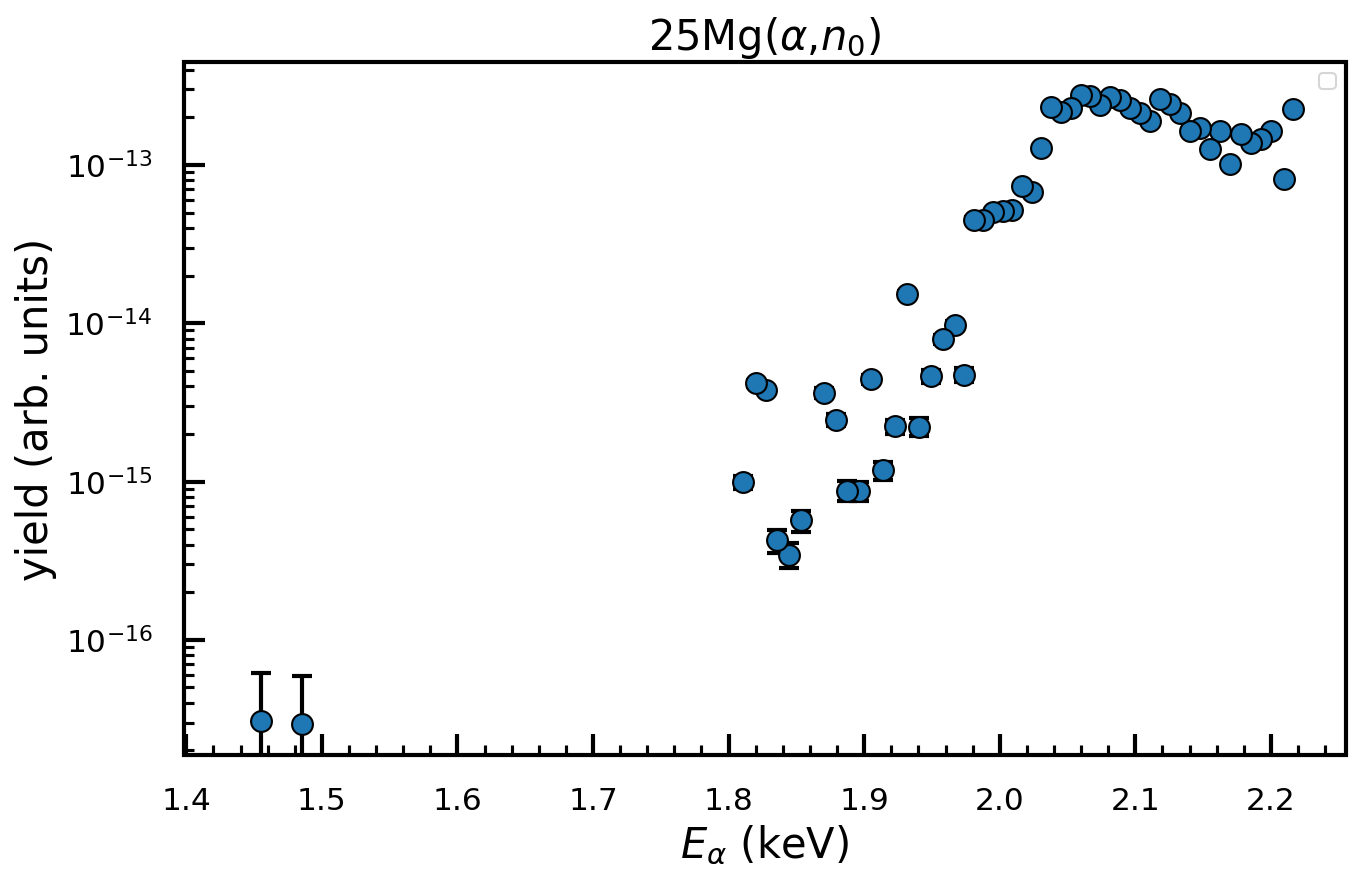

In [41]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
fig.set_dpi(150)
fig.set_size_inches(10,6)
#Axis ticks 
ax.tick_params(which='major', direction='in', width=2, length=10, color='k', pad=15)
ax.tick_params(which='minor', direction='in', width=1.5, length=5, color='k', pad=15)
ax.xaxis.set_minor_locator(mtick.AutoMinorLocator(5))
ax.yaxis.set_minor_locator(mtick.AutoMinorLocator(5))
ax.tick_params(labelsize=15)
ax.patch.set_edgecolor('k')
ax.patch.set_linewidth(2)
ax.errorbar(energy_masked_1,yield_25Mg_n0_masked_1,yerr=yield_25Mg_n0_err_masked_1,color="tab:blue",fmt='o',ms=10,ecolor='k',solid_capstyle='projecting', capsize=5,capthick=2,elinewidth=2,markeredgecolor='k')
#plt.plot(energy_masked_1,yield_25Mg_masked_1,"o",ms=10,color="blue",markeredgecolor="k")
#ax.errorbar(energy[102:131],yield_25Mg_n0[102:131],yerr=yield_25Mg_n0_err[102:131],color="tab:blue",fmt='o',ms=10,ecolor='k',solid_capstyle='projecting', capsize=5,capthick=2,elinewidth=2,markeredgecolor='k')
#ax.errorbar(energy_masked_1,yield_25Mg_n1_masked_1,yerr=yield_25Mg_n1_err_masked_1,color="tab:blue",fmt='o',ms=10,ecolor='k',solid_capstyle='projecting', capsize=5,capthick=2,elinewidth=2,markeredgecolor='k')


#plt.plot(energy[102:131],yield_25Mg[102:131],"o",ms=10,color="blue",markeredgecolor="k")
plt.legend()
plt.yscale("log")
plt.xlabel("$E_{\\alpha}$ (keV)",fontsize=20)
plt.ylabel("yield (arb. units)",fontsize=20)
#plt.xlim(1600,2300)
plt.title("25Mg($\\alpha$,$n_{0}$)",fontsize=20)
plt.savefig("Neutron_unfolded_yield_25Mg_n0.png")

In [42]:
# Loading data from the secondary gamma ray fit
data_secondary_gamma = np.loadtxt("/Users/shahinashahina/Documents/PhD/Experiments/25Mg(a,n)/CAMPAIGN_2021/25Mg_CAMPAIGN_2021/secondary_gamma_yield/yield_secondary_gamma_25Mg_n1.txt")

In [43]:
Energy_sg = data_secondary_gamma[:,0]
Yield_sg = data_secondary_gamma[:,1]
dYield_sg = data_secondary_gamma[:,2]

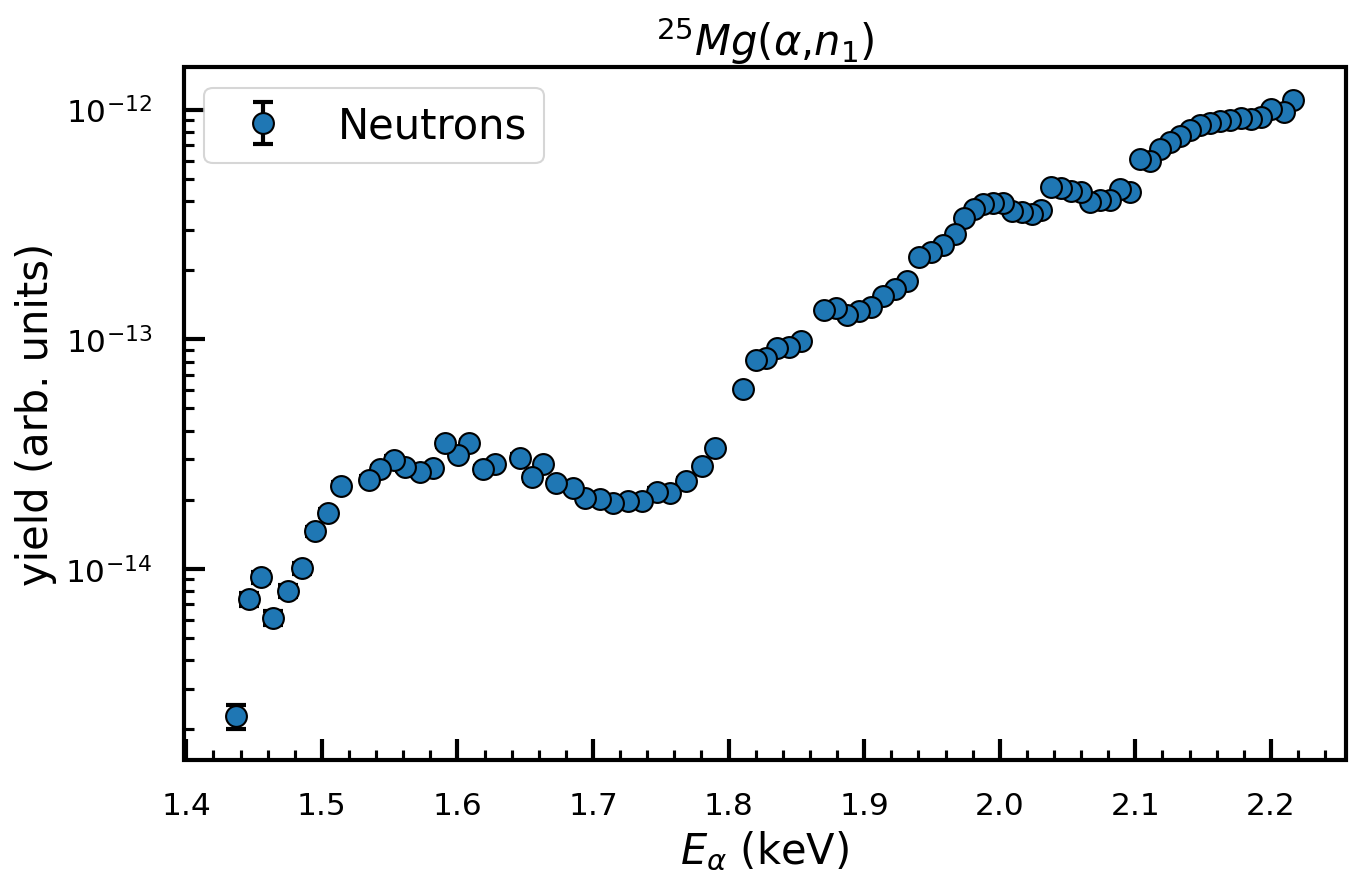

In [44]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
fig.set_dpi(150)
fig.set_size_inches(10,6)
#Axis ticks 
ax.tick_params(which='major', direction='in', width=2, length=10, color='k', pad=15)
ax.tick_params(which='minor', direction='in', width=1.5, length=5, color='k', pad=15)
ax.xaxis.set_minor_locator(mtick.AutoMinorLocator(5))
ax.yaxis.set_minor_locator(mtick.AutoMinorLocator(5))
ax.tick_params(labelsize=15)
ax.patch.set_edgecolor('k')
ax.patch.set_linewidth(2)
ax.errorbar(energy_masked_1,yield_25Mg_n1_masked_1,yerr=yield_25Mg_n1_err_masked_1,color="tab:blue",fmt='o',ms=10,ecolor='k',solid_capstyle='projecting', capsize=5,capthick=2,elinewidth=2,markeredgecolor='k',label="Neutrons")
#ax.errorbar(Energy_sg,Yield_sg,yerr=dYield_sg,color="tab:orange",fmt='o',ms=10,ecolor='k',solid_capstyle='projecting', capsize=5,capthick=2,elinewidth=2,markeredgecolor='k',label="Secondary gamma")
#plt.plot(energy_masked_1,yield_25Mg_masked_1,"o",ms=10,color="blue",markeredgecolor="k")
#ax.errorbar(energy[102:131],yield_25Mg_n1[102:131],yerr=yield_25Mg_n1_err[102:131],color="tab:blue",fmt='o',ms=10,ecolor='k',solid_capstyle='projecting', capsize=5,capthick=2,elinewidth=2,markeredgecolor='k')
#ax.errorbar(energy_masked_1,yield_25Mg_n1_masked_1,yerr=yield_25Mg_n1_err_masked_1,color="tab:blue",fmt='o',ms=10,ecolor='k',solid_capstyle='projecting', capsize=5,capthick=2,elinewidth=2,markeredgecolor='k')


#plt.plot(energy[102:131],yield_25Mg[102:131],"o",ms=10,color="blue",markeredgecolor="k")
plt.legend(fontsize=20)
plt.yscale("log")
plt.xlabel("$E_{\\alpha}$ (keV)",fontsize=20)
plt.ylabel("yield (arb. units)",fontsize=20)
plt.title("$^{25}Mg$($\\alpha$,$n_{1}$)",fontsize=20)
plt.savefig("Neutron_unfolded_yield_25Mg_n1.png")

In [45]:
# Writing arrays to a file
output_file_4 = "yield_data_files/yield_25Mg_n1.txt"

with open(output_file_4, 'w') as file4:
    for i in range(len(energy_masked_1)):
        file4.write("%f \t %f \t %f \n" %(energy_masked_1[i],yield_25Mg_n1_masked_1[i],yield_25Mg_n1_err_masked_1[i]))
file4.close()

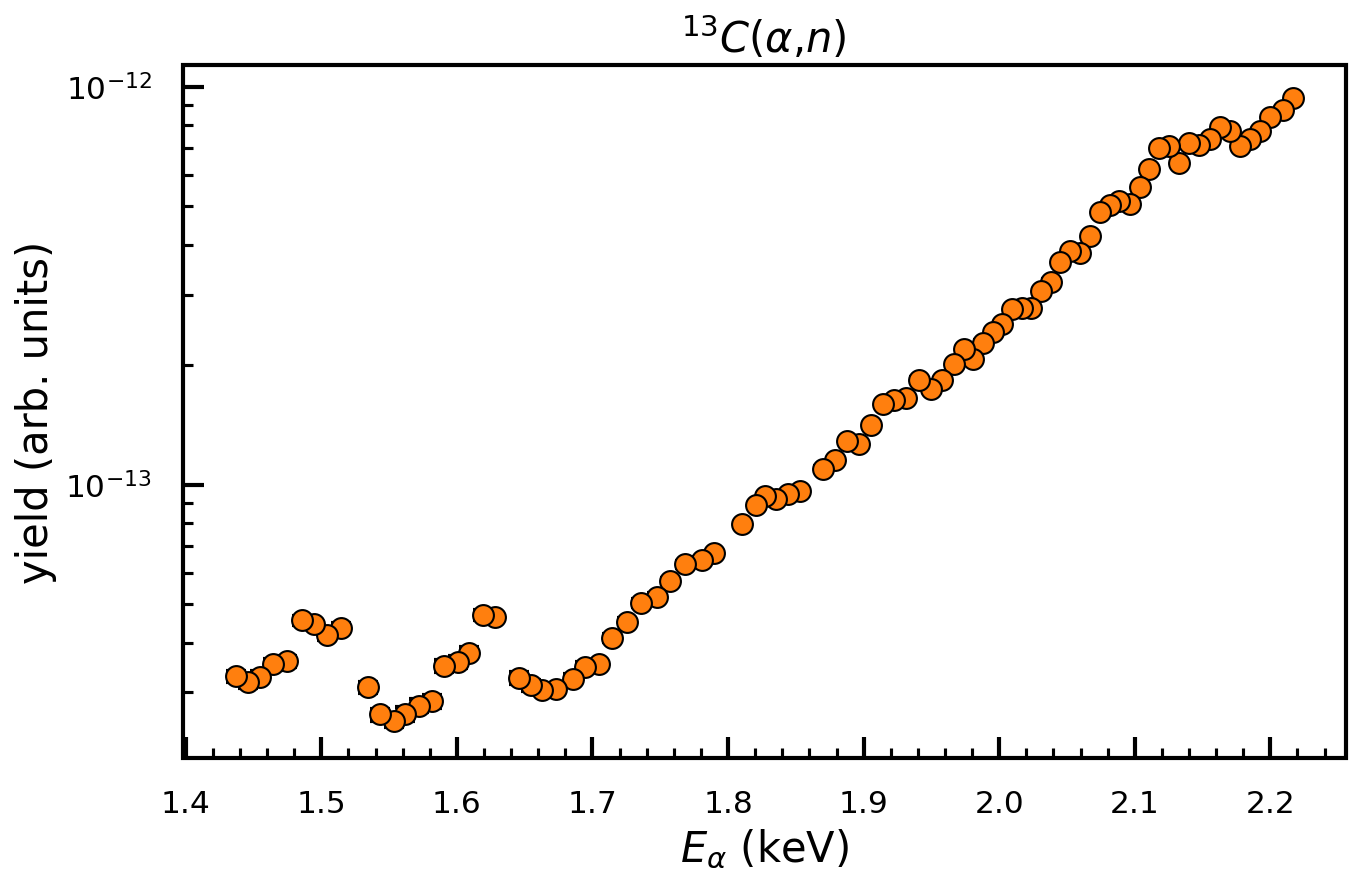

In [46]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
fig.set_dpi(150)
fig.set_size_inches(10,6)
#Axis ticks 
ax.tick_params(which='major', direction='in', width=2, length=10, color='k', pad=15)
ax.tick_params(which='minor', direction='in', width=1.5, length=5, color='k', pad=15)
ax.xaxis.set_minor_locator(mtick.AutoMinorLocator(5))
ax.yaxis.set_minor_locator(mtick.AutoMinorLocator(5))
ax.tick_params(labelsize=15)
ax.patch.set_edgecolor('k')
ax.patch.set_linewidth(2)
ax.errorbar(energy[0:87],yield_13C[0:87],yerr=yield_13C_err[0:87],color="tab:orange",fmt='o',ms=10,ecolor='k',solid_capstyle='projecting', capsize=5,capthick=2,elinewidth=2,markeredgecolor='k')
#ax.errorbar(energy[102:131],yield_13C[102:131],yerr=yield_13C_err[102:131],color="tab:orange",fmt='o',ms=10,ecolor='k',solid_capstyle='projecting', capsize=5,capthick=2,elinewidth=2,markeredgecolor='k')
#plt.plot(energy_masked_1,yield_25Mg_masked_1,"o",ms=10,color="blue",markeredgecolor="k")
plt.yscale("log")
plt.xlabel("$E_{\\alpha}$ (keV)",fontsize=20)
plt.ylabel("yield (arb. units)",fontsize=20)
plt.title("$^{13}C$($\\alpha$,$n$)",fontsize=20)
plt.savefig("Neutron_unfolded_yield_13C.png")

In [47]:
energy[0:87]

array([2.21645852, 2.20929887, 2.20004881, 2.19269976, 2.18504474,
       2.17774131, 2.17008178, 2.1627115 , 2.15521101, 2.14768283,
       2.1403304 , 2.13293986, 2.1256026 , 2.11808593, 2.11070365,
       2.10353572, 2.09612859, 2.08871445, 2.08140362, 2.07418563,
       2.06691028, 2.05971848, 2.05237803, 2.04501195, 2.03787722,
       2.03071537, 2.02375384, 2.0165577 , 2.00935468, 2.00210559,
       1.99510503, 1.98789151, 1.98070082, 1.97370854, 1.96663123,
       1.95809887, 1.94938142, 1.9405383 , 1.93149327, 1.92272937,
       1.91406228, 1.90532848, 1.8964138 , 1.88764407, 1.87904699,
       1.87030805, 1.85313709, 1.84436437, 1.83573478, 1.82731319,
       1.82032561, 1.81038793, 1.78991581, 1.78062688, 1.76857169,
       1.75700851, 1.74725461, 1.73610917, 1.72567445, 1.71451631,
       1.70499914, 1.69421549, 1.68529583, 1.67284067, 1.66281307,
       1.65464653, 1.64600998, 1.62786527, 1.61913991, 1.60864935,
       1.60058193, 1.59056341, 1.58199989, 1.57219652, 1.56164

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


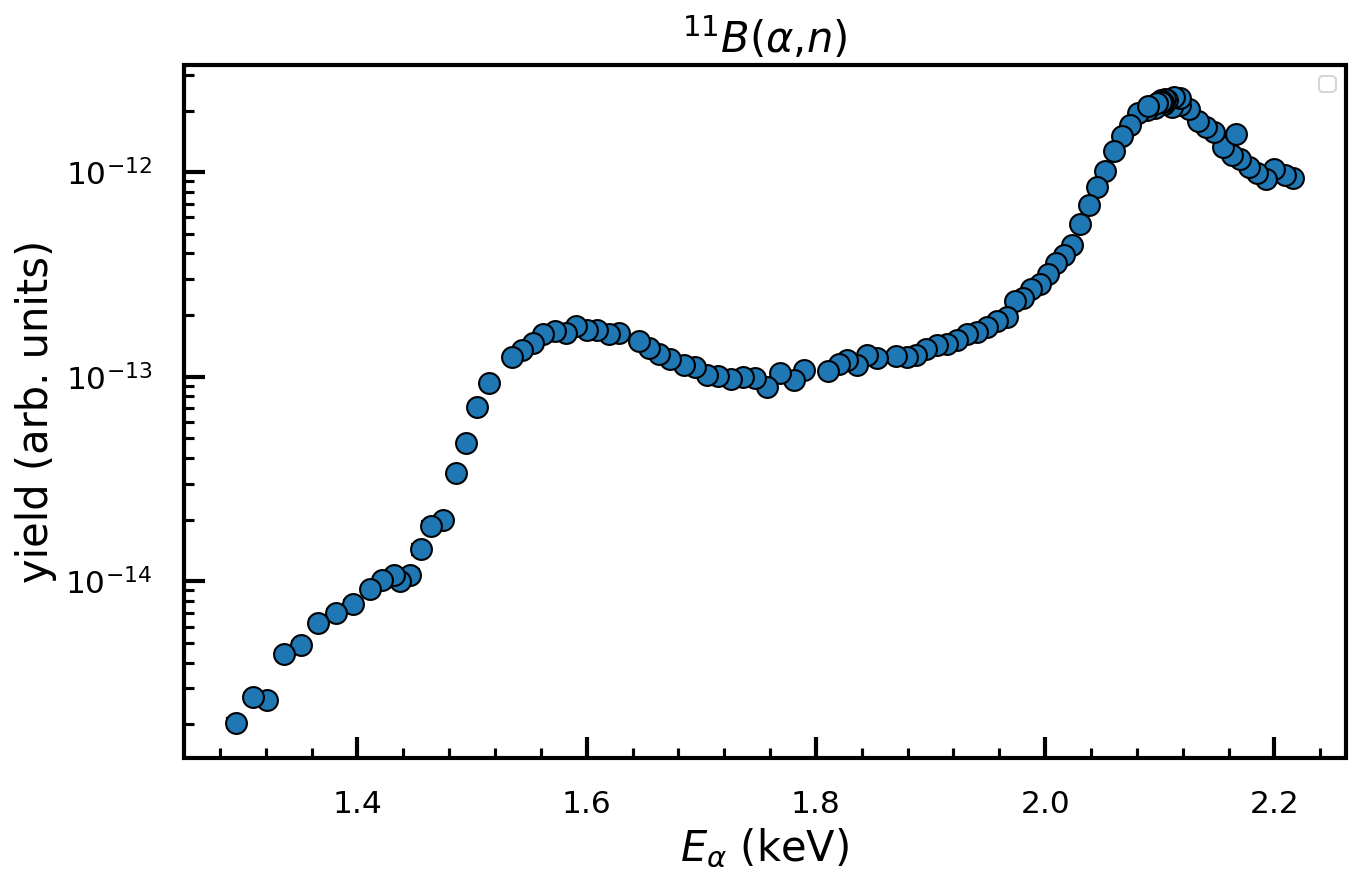

In [48]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
fig.set_dpi(150)
fig.set_size_inches(10,6)
#Axis ticks 
ax.tick_params(which='major', direction='in', width=2, length=10, color='k', pad=15)
ax.tick_params(which='minor', direction='in', width=1.5, length=5, color='k', pad=15)
ax.xaxis.set_minor_locator(mtick.AutoMinorLocator(5))
ax.yaxis.set_minor_locator(mtick.AutoMinorLocator(5))
ax.tick_params(labelsize=15)
ax.patch.set_edgecolor('k')
ax.patch.set_linewidth(2)
ax.errorbar(energy,yield_11B,yerr=yield_11B_err,color="tab:blue",fmt='o',ms=10,ecolor='k',solid_capstyle='projecting', capsize=5,capthick=2,elinewidth=2,markeredgecolor='k')
#plt.plot(energy_masked_1,yield_25Mg_masked_1,"o",ms=10,color="blue",markeredgecolor="k")
#ax.errorbar(energy[102:131],yield_25Mg_n1[102:131],yerr=yield_25Mg_n1_err[102:131],color="tab:blue",fmt='o',ms=10,ecolor='k',solid_capstyle='projecting', capsize=5,capthick=2,elinewidth=2,markeredgecolor='k')
#ax.errorbar(energy_masked_1,yield_25Mg_n1_masked_1,yerr=yield_25Mg_n1_err_masked_1,color="tab:blue",fmt='o',ms=10,ecolor='k',solid_capstyle='projecting', capsize=5,capthick=2,elinewidth=2,markeredgecolor='k')


#plt.plot(energy[102:131],yield_25Mg[102:131],"o",ms=10,color="blue",markeredgecolor="k")
plt.legend()
plt.yscale("log")
plt.title("$^{11}B$($\\alpha$,$n$)",fontsize=20)
plt.xlabel("$E_{\\alpha}$ (keV)",fontsize=20)
plt.ylabel("yield (arb. units)",fontsize=20)
plt.savefig("Neutron_unfolded_yield_11B.png")

In [49]:
data_24Mg = np.loadtxt("counts_24Mg_unfolding.txt")

In [50]:
runNumber_24Mg = data_24Mg[:,0]
charge_24Mg = data_24Mg[:,1]
beamEnergy_24Mg = data_24Mg[:,2]
counts_10B_24Mg = data_24Mg[:,3]
counts_11B_24Mg = data_24Mg[:,4]

In [51]:
yield_10B = counts_10B_24Mg/(charge_24Mg)
yield_10B_err = (np.sqrt(counts_10B_24Mg))/(charge_24Mg)

In [52]:
yield_11B_24Mg = counts_11B_24Mg/(charge_24Mg)
yield_11B_err_24Mg = (np.sqrt(counts_11B_24Mg))/(charge_24Mg)

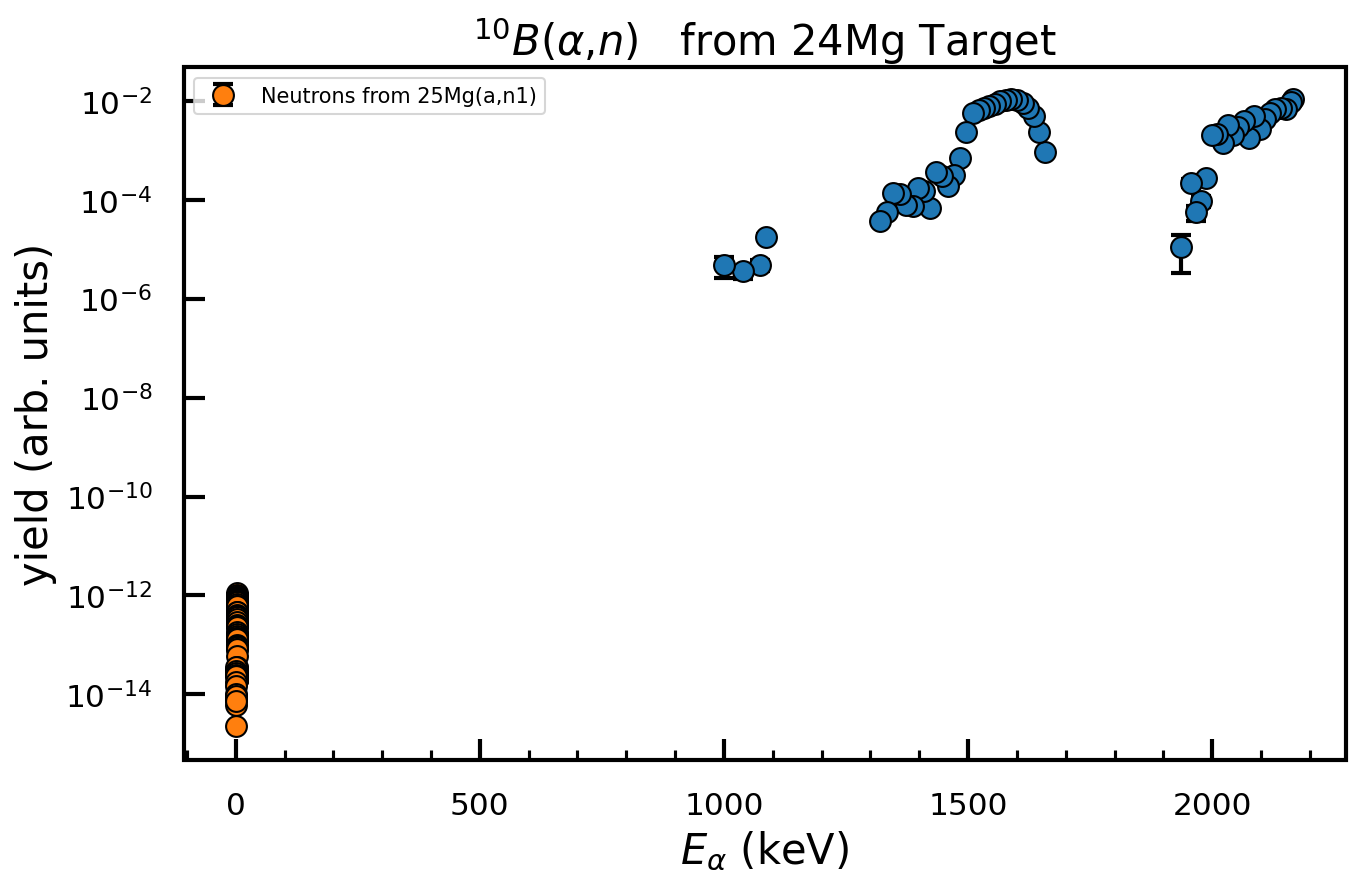

In [53]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
fig.set_dpi(150)
fig.set_size_inches(10,6)
#Axis ticks 
ax.tick_params(which='major', direction='in', width=2, length=10, color='k', pad=15)
ax.tick_params(which='minor', direction='in', width=1.5, length=5, color='k', pad=15)
ax.xaxis.set_minor_locator(mtick.AutoMinorLocator(5))
ax.yaxis.set_minor_locator(mtick.AutoMinorLocator(5))
ax.tick_params(labelsize=15)
ax.patch.set_edgecolor('k')
ax.patch.set_linewidth(2)
ax.errorbar(beamEnergy_24Mg,yield_10B,yerr=yield_10B_err,fmt='o',ms=10,ecolor='k',solid_capstyle='projecting', capsize=5,capthick=2,elinewidth=2,markeredgecolor='k')
ax.errorbar(energy_masked_1,yield_25Mg_n1_masked_1,yerr=yield_25Mg_n1_err_masked_1,fmt='o',ms=10,ecolor='k',solid_capstyle='projecting', capsize=5,capthick=2,elinewidth=2,markeredgecolor='k',label="Neutrons from 25Mg(a,n1)")
#plt.plot(energy_masked_1,yield_25Mg_masked_1,"o",ms=10,color="blue",markeredgecolor="k")
#ax.errorbar(energy[102:131],yield_25Mg_n1[102:131],yerr=yield_25Mg_n1_err[102:131],color="tab:blue",fmt='o',ms=10,ecolor='k',solid_capstyle='projecting', capsize=5,capthick=2,elinewidth=2,markeredgecolor='k')
#ax.errorbar(energy_masked_1,yield_25Mg_n1_masked_1,yerr=yield_25Mg_n1_err_masked_1,color="tab:blue",fmt='o',ms=10,ecolor='k',solid_capstyle='projecting', capsize=5,capthick=2,elinewidth=2,markeredgecolor='k')


#plt.plot(energy[102:131],yield_25Mg[102:131],"o",ms=10,color="blue",markeredgecolor="k")
plt.legend()
plt.yscale("log")
plt.title("$^{10}B$($\\alpha$,$n$)   from 24Mg Target",fontsize=20)
plt.xlabel("$E_{\\alpha}$ (keV)",fontsize=20)
plt.ylabel("yield (arb. units)",fontsize=20)
plt.savefig("plots/10B_24Mg.png")

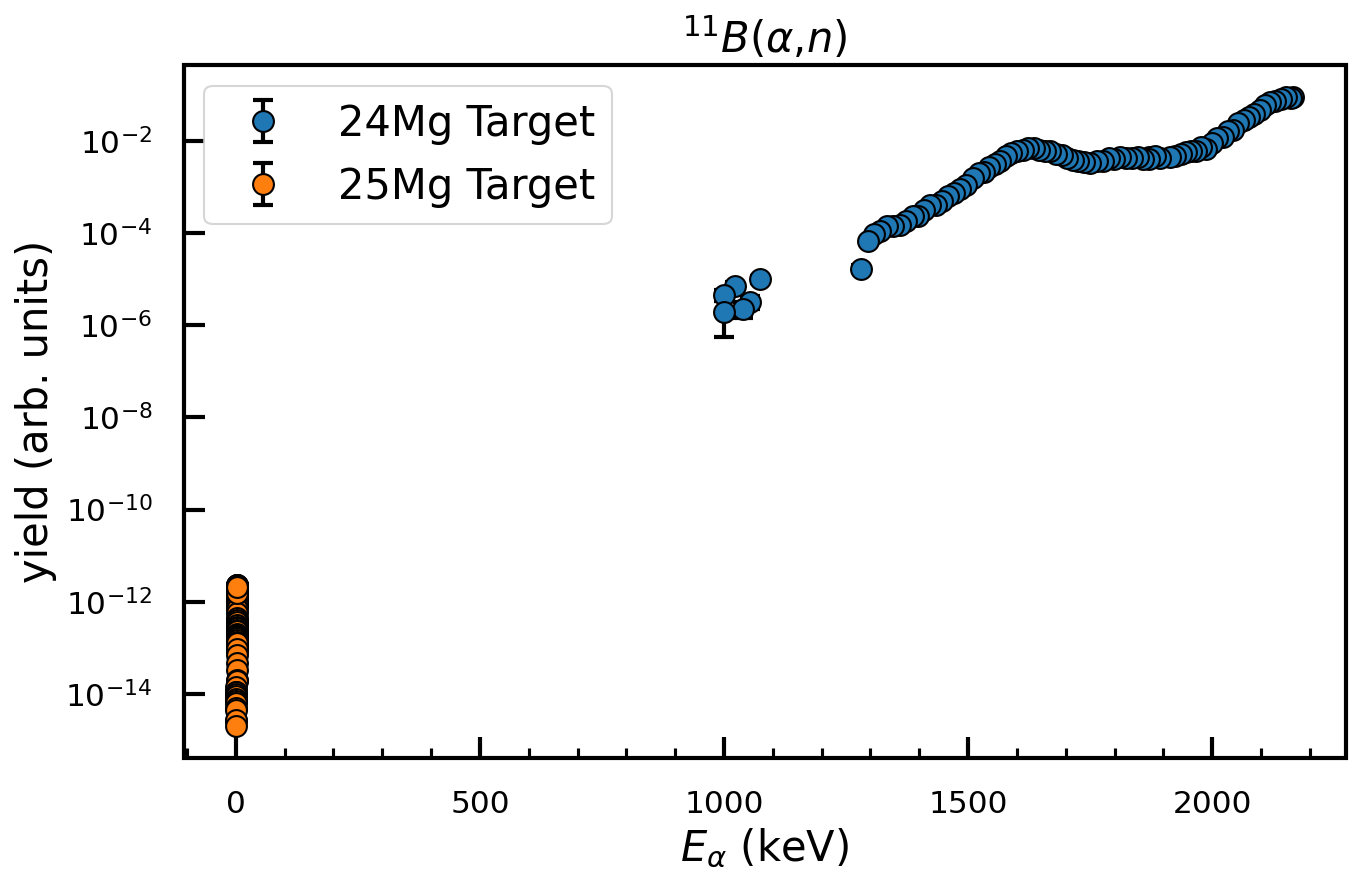

In [54]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
fig.set_dpi(150)
fig.set_size_inches(10,6)
#Axis ticks 
ax.tick_params(which='major', direction='in', width=2, length=10, color='k', pad=15)
ax.tick_params(which='minor', direction='in', width=1.5, length=5, color='k', pad=15)
ax.xaxis.set_minor_locator(mtick.AutoMinorLocator(5))
ax.yaxis.set_minor_locator(mtick.AutoMinorLocator(5))
ax.tick_params(labelsize=15)
ax.patch.set_edgecolor('k')
ax.patch.set_linewidth(2)
ax.errorbar(beamEnergy_24Mg,yield_11B_24Mg,yerr=yield_11B_err_24Mg,fmt='o',ms=10,ecolor='k',solid_capstyle='projecting', capsize=5,capthick=2,elinewidth=2,markeredgecolor='k',label= "24Mg Target")
ax.errorbar(energy,yield_11B,yerr=yield_11B_err,color="tab:orange",fmt='o',ms=10,ecolor='k',solid_capstyle='projecting', capsize=5,capthick=2,elinewidth=2,markeredgecolor='k',label="25Mg Target")
#ax.errorbar(energy_masked_1,yield_25Mg_n1_masked_1,yerr=yield_25Mg_n1_err_masked_1,fmt='o',ms=10,ecolor='k',solid_capstyle='projecting', capsize=5,capthick=2,elinewidth=2,markeredgecolor='k',label="Neutrons from 25Mg(a,n1)")
#plt.plot(energy_masked_1,yield_25Mg_masked_1,"o",ms=10,color="blue",markeredgecolor="k")
#ax.errorbar(energy[102:131],yield_25Mg_n1[102:131],yerr=yield_25Mg_n1_err[102:131],color="tab:blue",fmt='o',ms=10,ecolor='k',solid_capstyle='projecting', capsize=5,capthick=2,elinewidth=2,markeredgecolor='k')
#ax.errorbar(energy_masked_1,yield_25Mg_n1_masked_1,yerr=yield_25Mg_n1_err_masked_1,color="tab:blue",fmt='o',ms=10,ecolor='k',solid_capstyle='projecting', capsize=5,capthick=2,elinewidth=2,markeredgecolor='k')


#plt.plot(energy[102:131],yield_25Mg[102:131],"o",ms=10,color="blue",markeredgecolor="k")
plt.legend(fontsize=20)
plt.yscale("log")
plt.title("$^{11}B$($\\alpha$,$n$)",fontsize=20)
plt.xlabel("$E_{\\alpha}$ (keV)",fontsize=20)
plt.ylabel("yield (arb. units)",fontsize=20)
plt.savefig("plots/11B_both_targets.png")

In [55]:
pwd

'/Users/shahinashahina/Documents/PhD/Experiments/25Mg(a,n)/CAMPAIGN_2021/25Mg_codes_Shahina/python3_code'